# About Dataset :

The estimation of calories burned by individuals is based on a formula and MET charts. This study aims to predict the calories burned using a regression model as one of the machine learning algorithms to give more accurate results. Data preparation, cleaning, and analysis are the primary steps before they can be fed to the regression models.bold text

# Attribute Information

1.Gender: Male|Female

2.Age: Age of the person

3.Height: Height of the person

4.Weight: Weight of the person

5.Duration: Duration of the workout

6.Heart_Rate: Count of heart beat during the workout

7.Body_Temp: Body temperature during the workout

8.Calories: Amount of the calories

# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

**Data collection & Processing**

In [ ]:
# loading  and printing the data from csv file to a pandas  Dataframe
df1=pd.read_csv("/content/calories.csv")
df1


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [ ]:
df2=pd.read_csv("/content/exercise.csv")
df2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


# Combining the two Dataframes

In [ ]:
df=pd.concat([df2,df1['Calories']],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
# checking the number of rows and columns
df.shape

(15000, 9)

In [ ]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking whether there exist any missing values or not
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
# to check the type of the columns in the dataset
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

**here the column 'Gender' is in object form so we have to use 'Label Encoding'**

In [ ]:
# for finding the number of values in 'Gender'
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [ ]:
#creating an object for the function LabelEncoder
le=LabelEncoder()

In [ ]:
#for changing 'Gender' into intiger
df['Gender']=le.fit_transform(df['Gender'])
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
# for checking the type of the dataset
df.dtypes

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

# Data Analysis

In [ ]:
# to get the statistical measures of the dataset
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [ ]:
sns.set()

<ipython-input-15-25e28c14c6c9>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


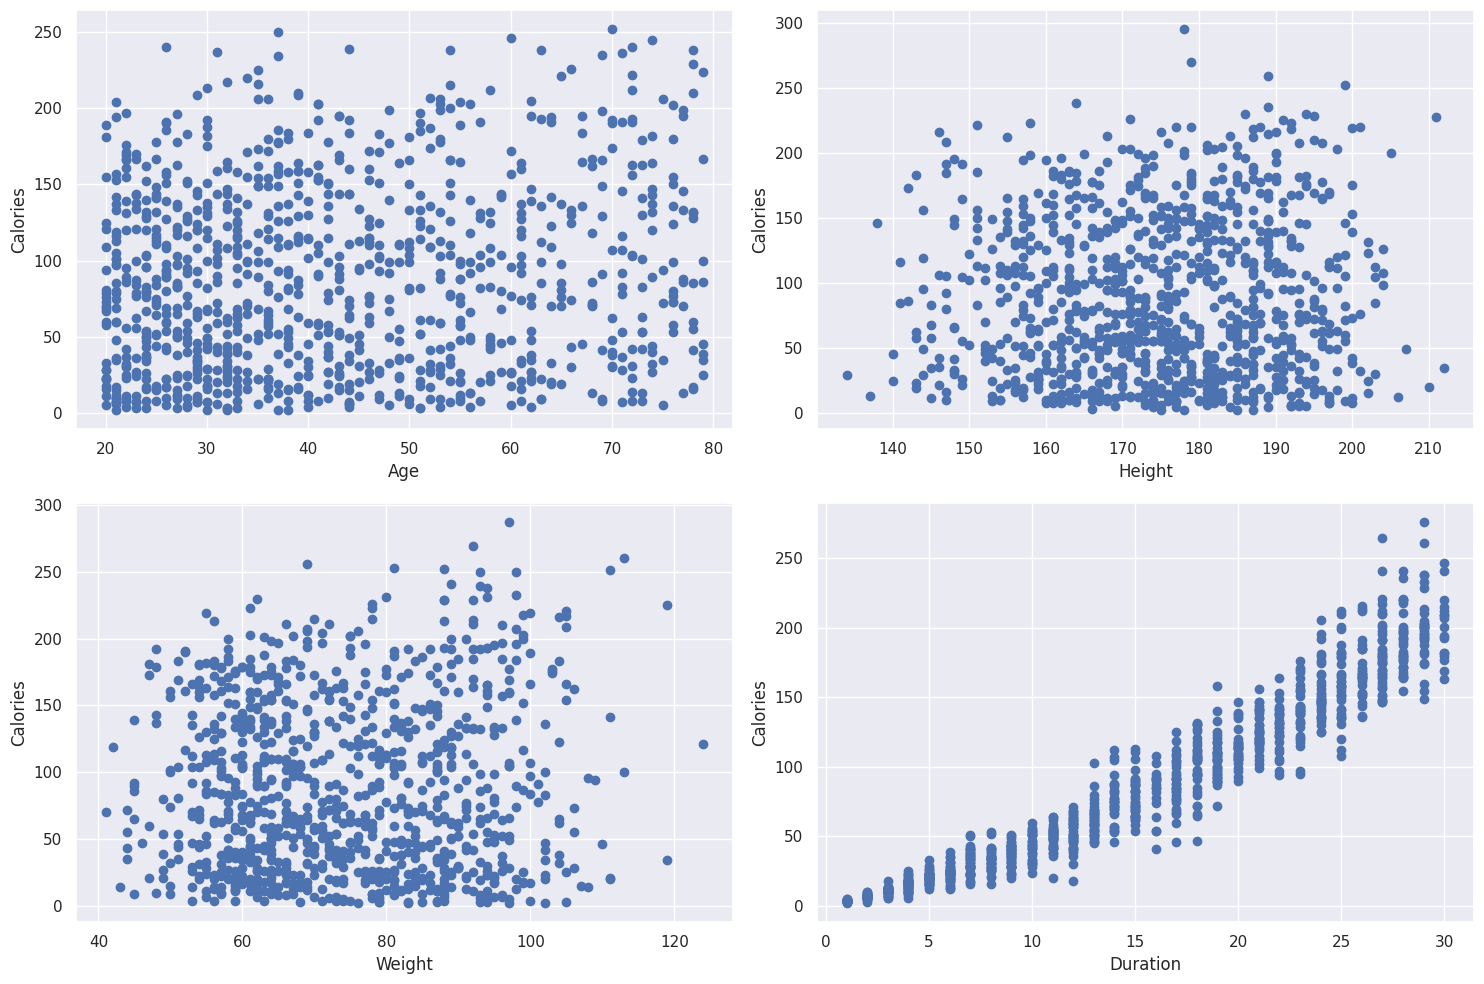

In [ ]:
features=['Age','Height','Weight','Duration']
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    x=df.sample(1000)
    plt.scatter(x[col],x['Calories'])
    plt.xlabel(col)
    plt.ylabel('Calories')
plt.tight_layout()
plt.show()

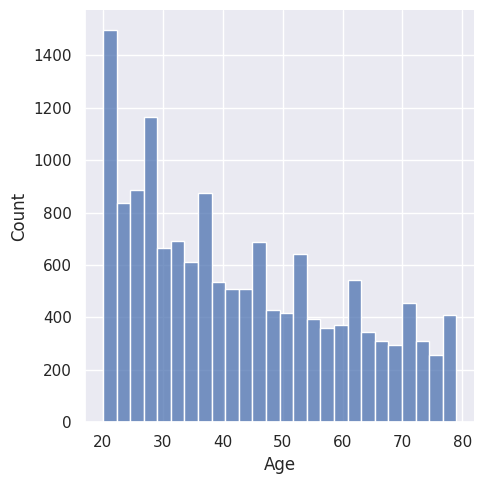

In [ ]:
sns.displot(df['Age'])

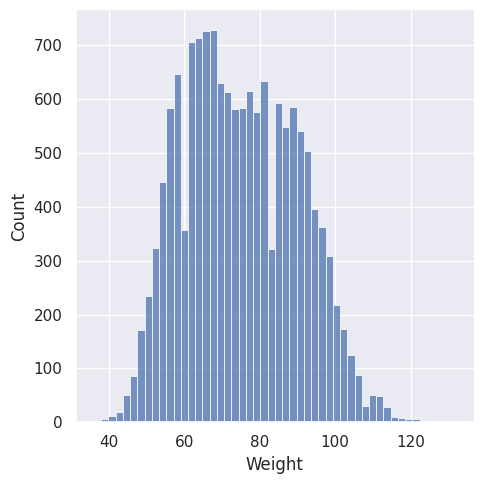

In [ ]:
sns.displot(df['Weight'])

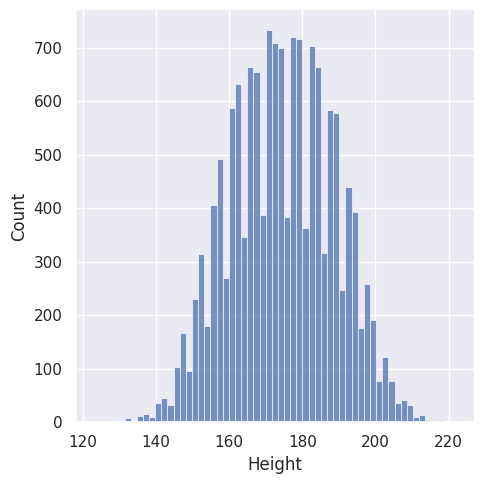

In [ ]:
sns.displot(df['Height'])

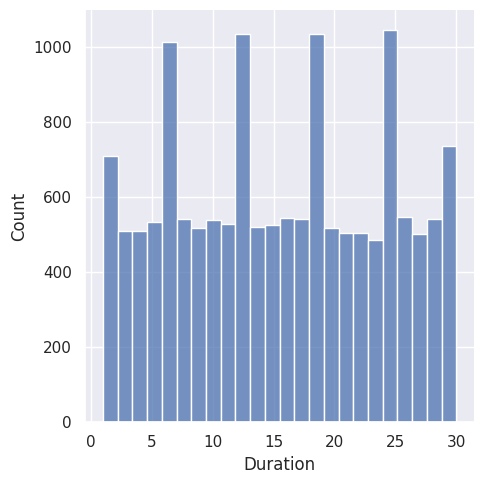

In [ ]:
sns.displot(df['Duration'])

# Finding the correlation in the dataset

1.Positive correlation

2.Negative correlation

In [ ]:
correlation=df.corr()

<Axes: >

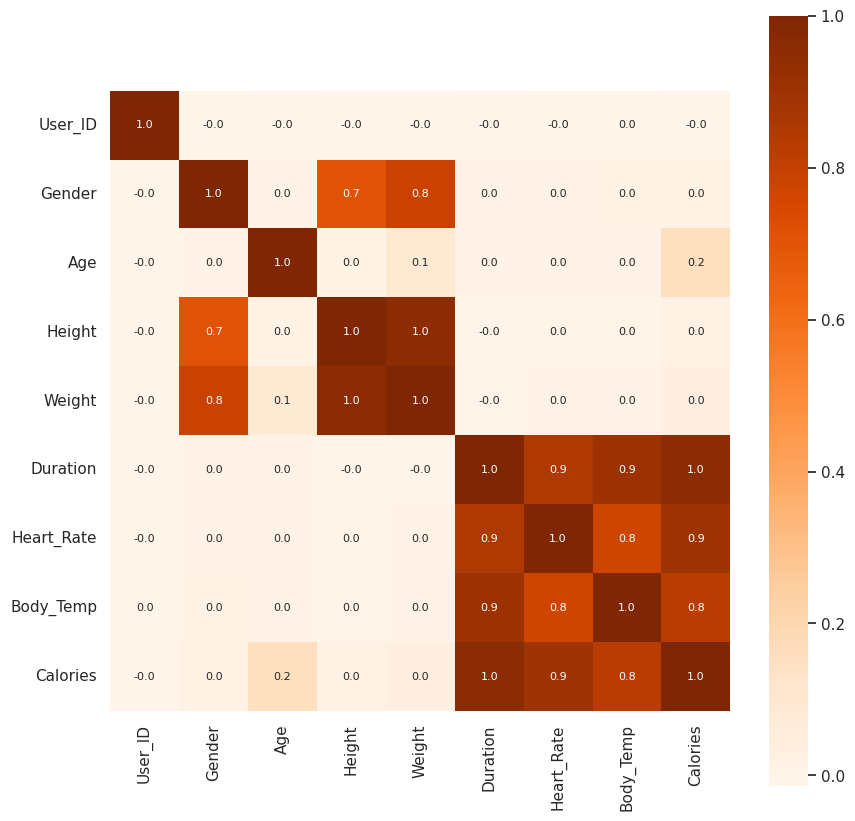

In [ ]:
#construction of  heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Oranges')

In [ ]:
df1=df.drop(['User_ID'],axis=1)
df1


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


# Separating features(X) and target(y)

In [ ]:
X=df1.iloc[:,:-1]
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [ ]:
y=df1.iloc[:,-1]
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

**scaling the values in X to make each column(in X) contribute equally to the prediction**

In [ ]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[ 1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [-0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [ 1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [-0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [ 1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [ 1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

In [ ]:
# splitting the data for training and testing (70% - training data , 30% - testing data)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X.shape

(15000, 7)

In [ ]:
X_train.shape

(10500, 7)

In [ ]:
X_test.shape

(4500, 7)

In [ ]:
y_train.shape

(10500,)

In [ ]:
y_test.shape

(4500,)

# **MODEL TRAINING**

1.XGboost

2.Linear Regression

3.Random Forest Regressor

4.Lasso

5.Ridge

# **XGboost**

In [ ]:
#loading the model and training the model with x_test
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_predicted=xgb.predict(X_test)
y_predicted

array([197.46324 ,  70.81234 , 193.53798 , ..., 219.79524 ,  21.116282,
        48.67507 ], dtype=float32)

**Mean Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute Error :',mean_absolute_error(y_test,y_predicted))

Mean absolute Error : 1.563047269291348


# **Linear Regression**

In [ ]:
#loading the model and training the model with x_test
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predicted=lr.predict(X_test)
y_predicted

array([198.83938059,  80.36338575, 194.56261829, ..., 213.77624754,
        10.06587693,  63.15185847])

**Mean Absolute Error**

In [ ]:
print('Mean absolute Error :',mean_absolute_error(y_test,y_predicted))

Mean absolute Error : 8.377255897559131


# **Random Forest Regressor**

In [ ]:
#loading the model and training the model with x_test
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_predicted=rf.predict(X_test)
y_predicted

array([196.95,  67.93, 195.12, ..., 213.39,  19.65,  49.35])

**Mean Absolute Error**

In [ ]:
print('Mean absolute Error :',mean_absolute_error(y_test,y_predicted))

Mean absolute Error : 1.8510844444444448


# **Lasso**

In [ ]:
#loading the model and training the model with x_test
ls=Lasso()
ls.fit(X_train,y_train)
y_predicted=ls.predict(X_test)
y_predicted

array([193.41805994,  79.42478974, 184.6640321 , ..., 207.92906913,
        14.92989242,  60.22409449])

**Mean Absolute Error**

In [ ]:
print('Mean absolute Error :',mean_absolute_error(y_test,y_predicted))

Mean absolute Error : 9.069953380754


# **Ridge**

In [ ]:
#loading the model and training the model with x_test
rg=Ridge()
rg.fit(X_train,y_train)
y_predicted=rg.predict(X_test)
y_predicted

array([198.81814679,  80.36848789, 194.52298288, ..., 213.75853216,
        10.08444792,  63.15094475])

**Mean Absolute Error**

In [ ]:
print('Mean absolute Error :',mean_absolute_error(y_test,y_predicted))

Mean absolute Error : 8.376463306742115


**RESULTS**



XGBooster Regressor()   :

Mean Absolute Error     : 1.563

Linear Regression()     :

Mean Absolute Error     : 8.377

RandomForestRegressor() :

Mean Absolute Error     : 1.873

Lasso()                 :

Mean Absolute Error     : 9.069

Ridge()                 :

Mean Absolute Error     : 8.376

**Conclusion:**



while using all this algorithms the Mean Absolute Error is lesser in XGboost regressor and RandomForestRegressor by comparing to others